# Estación Nuevos Ministerios

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_47.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,40.419355
2013-02-01,32.096774
2013-03-01,25.000000
2013-04-01,22.709677
2013-05-01,23.032258


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

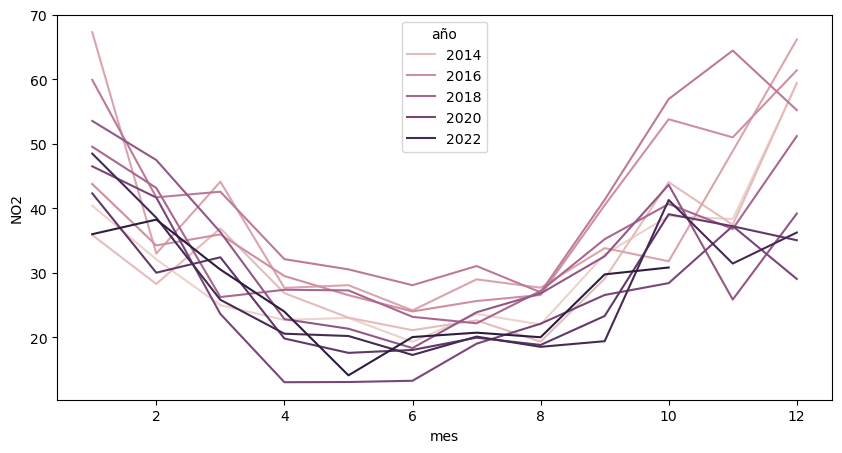

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

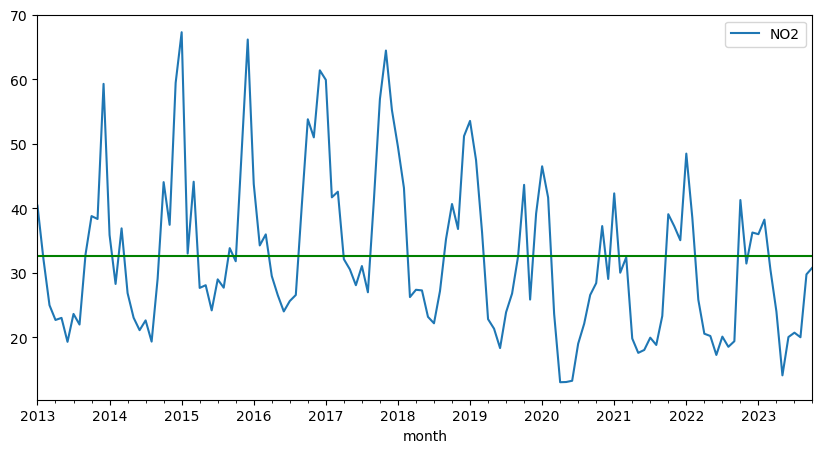

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

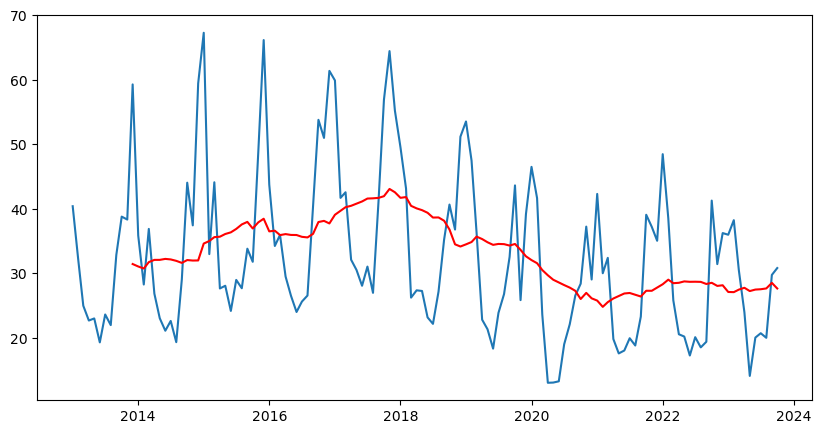

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [11]:
res = adfuller(df["NO2"])
res

(-0.6170382167040235,
 0.8670854248082063,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 789.0490131297729)

In [12]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.6170382167040235
p-value 0.8670854248082063
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [13]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6950077545008216
2 mes Lag, 0.4337064334491354
3 mes Lag, 0.16902692552574147
4 mes Lag, -0.15197988748853594
5 mes Lag, -0.36328983712420637
6 mes Lag, -0.43843959009654315
7 mes Lag, -0.37994229493194775
8 mes Lag, -0.19103649439680062
9 mes Lag, 0.11308725969761388
10 mes Lag, 0.4002269912994371
11 mes Lag, 0.6367380844758327
12 mes Lag, 0.7796955706287957
13 mes Lag, 0.6721755988403633
14 mes Lag, 0.4031716464424408
15 mes Lag, 0.12581323271835765
16 mes Lag, -0.1982318396432814
17 mes Lag, -0.4109915784707473
18 mes Lag, -0.5107316376695724
19 mes Lag, -0.45985782350413473
20 mes Lag, -0.23316309281431355
21 mes Lag, 0.07031813814466811
22 mes Lag, 0.31495531315845965
23 mes Lag, 0.5783139632187723
24 mes Lag, 0.720407858439707
25 mes Lag, 0.5814627493133544
26 mes Lag, 0.3563415877343369
27 mes Lag, 0.08141480574471052
28 mes Lag, -0.25815003863498026
29 mes Lag, -0.47896847732643577
30 mes Lag, -0.5829354650866732
31 mes Lag, -0.5239483854899617
32 me

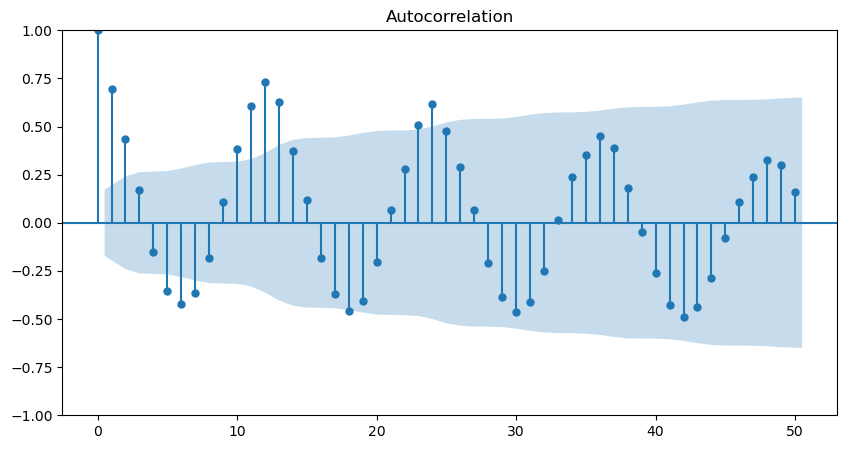

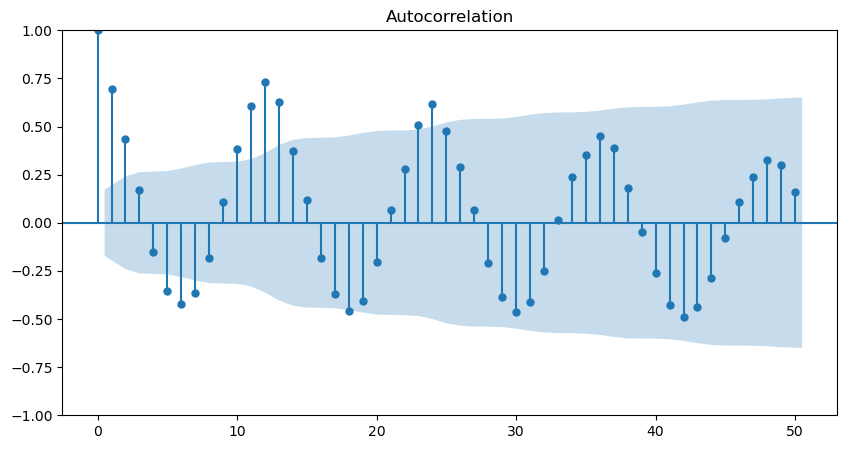

In [14]:
plot_acf(df, lags = 50)

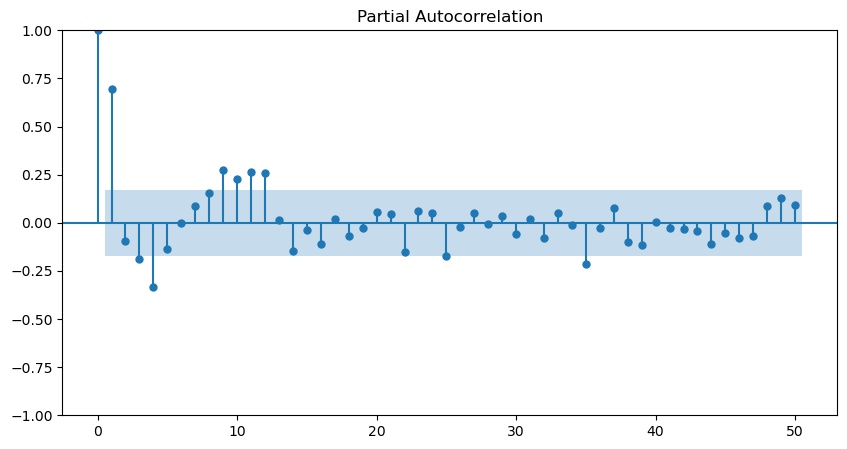

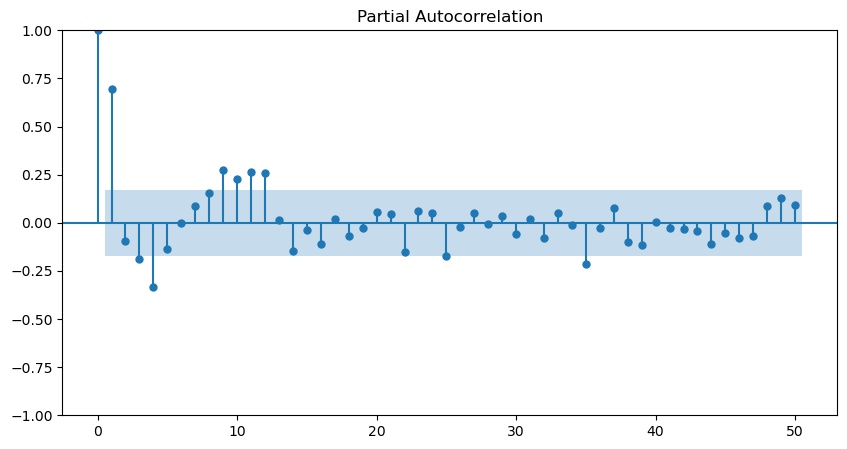

In [15]:
plot_pacf(df, lags = 50)

In [16]:
df.head()

,NO2
month,
2013-01-01,40.419355
2013-02-01,32.096774
2013-03-01,25.000000
2013-04-01,22.709677
2013-05-01,23.032258


In [17]:
df.shape

(130, 1)

In [18]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [19]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [20]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [21]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 58%|█████▊    | 14/24 [00:00<00:00, 29.08it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packag

CPU times: total: 875 ms
Wall time: 1.17 s


In [22]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
8,10.530150,"(1, 1, 2)"
14,11.015881,"(2, 1, 2)"
1,11.030540,"(0, 1, 1)"
6,11.038826,"(1, 1, 0)"
7,11.055822,"(1, 1, 1)"


In [23]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(1, 1, 2, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  3.467047918172345
CPU times: total: 188 ms
Wall time: 280 ms


,real,pred,error
2021-05-01,17.612903,19.551025,1.938122
2021-06-01,18.064516,17.923986,-0.140530
2021-07-01,19.967742,22.513564,2.545822
2021-08-01,18.838710,24.930473,6.091763
2021-09-01,23.322581,31.521753,8.199172
2021-10-01,39.096774,38.586238,-0.510537
2021-11-01,37.225806,36.214726,-1.011080
2021-12-01,35.064516,39.559082,4.494566
2022-01-01,48.483871,46.376610,-2.107261
2022-02-01,38.548387,37.608299,-0.940088


In [24]:
pred["real_test"] = y_test

In [25]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,36.475200
2023-12-01,38.926153
2024-01-01,46.211013
2024-02-01,37.061483
2024-03-01,30.264364
2024-04-01,19.403600
2024-05-01,18.982319
2024-06-01,17.485743
2024-07-01,21.993861
2024-08-01,24.558002


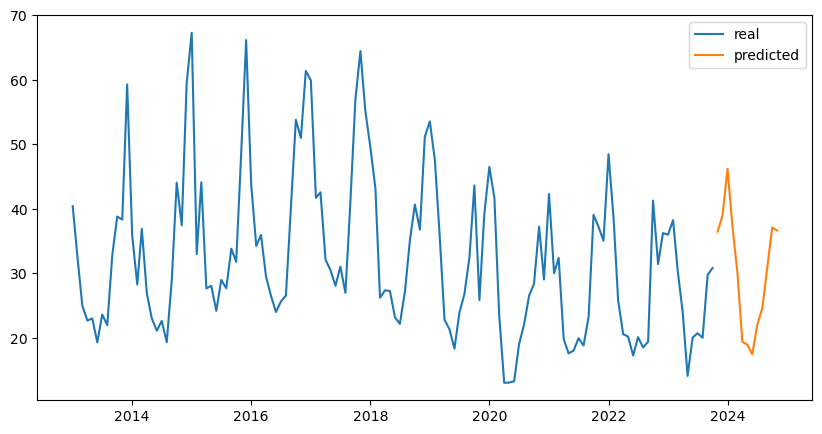

In [26]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [27]:
pred_año.mean()

predicted_mean    30.464764
dtype: float64

In [28]:
#Corrección primer valor de la predicción

# Obtener el valor de la fila '2023-11-01' y columna 'predicted_mean' en pred_año
valor_pred_año = pred_año.loc['2023-11-01', 'predicted_mean']

# Obtener el valor de la fila '2023-10-01' y columna 'NO2' en df
valor_df = df.loc['2023-10-01', 'NO2']

# Calcular la media entre los dos valores
media = (valor_pred_año + valor_df) / 2

# Sustituir el valor calculado en pred_año
pred_año.loc['2023-11-01', 'predicted_mean'] = media

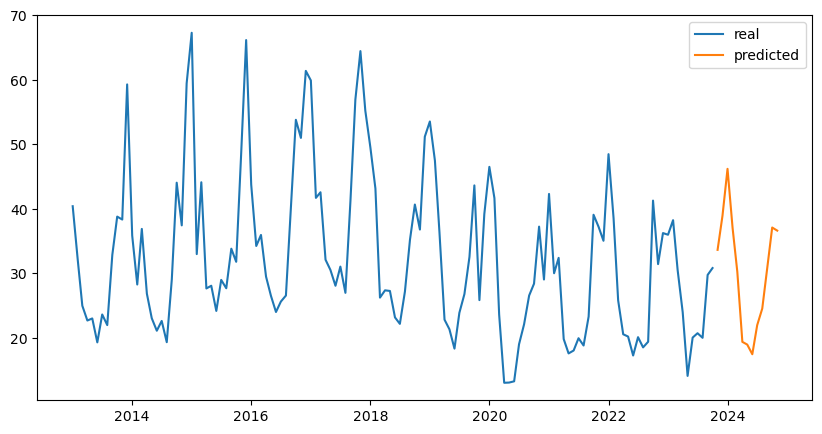

In [29]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [30]:
pred_año.mean()

predicted_mean    30.247976
dtype: float64